Segment 1: Frequentist Statistics

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

Measures of Central Tendency - provide a summary statistics on the center of a given distributions. AKA the "average" values of a distribution.

In [4]:
x = st.skewnorm.rvs(10, size=1000)


In [5]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

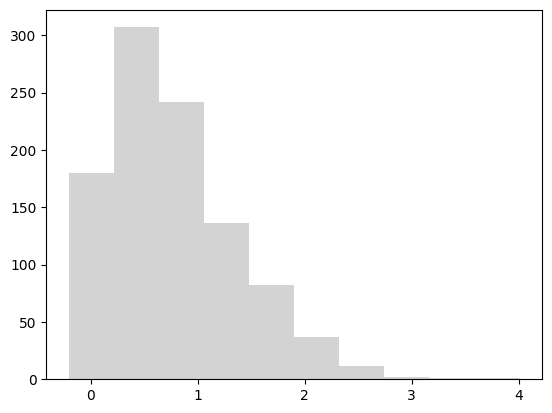

In [6]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

Mean - is the average and the most common measure of central tendency

In [7]:
xbar = x.mean()
xbar

0.7719211854654121

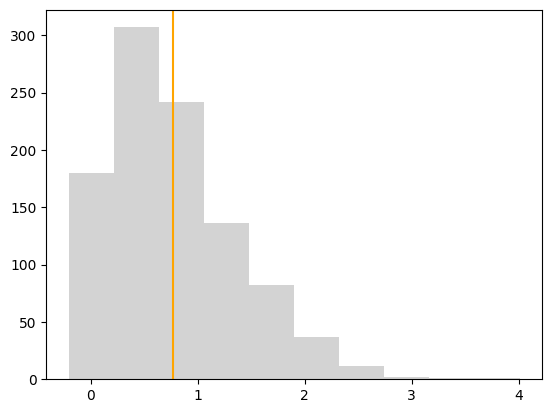

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

Median - the midpoint value in the distribution

In [9]:
np.median(x)

0.651420257427958

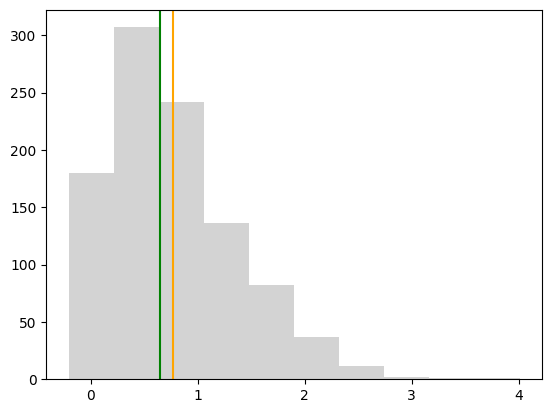

In [10]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [12]:
x.var() ** (1/2)

0.5960572059628305

In [11]:
sigma = x.std()
sigma

0.5960572059628305

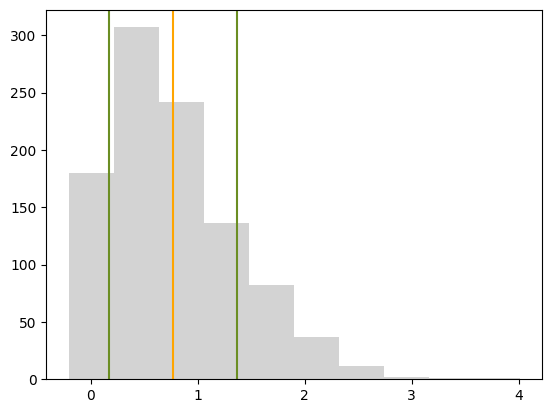

In [13]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

Standard Error

In [14]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [15]:
st.sem(x)

0.018858415432183823

In [16]:
st.sem(x, ddof=0)

0.018848983865986414

Gaussian Distribution - is also the normal distribution

In [17]:
x = np.random.normal(size=10000)

In [18]:
sns.set_style('ticks')

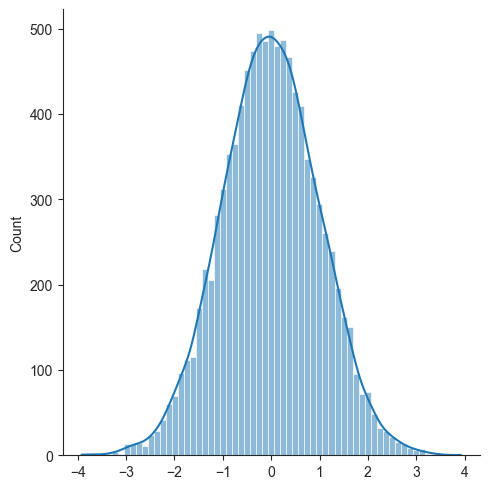

In [19]:
_ = sns.displot(x, kde=True)

In [20]:
x.mean()

-0.01626305454909193

In [21]:
x.std()

1.0039756140435032

The Central Limit Theorem

In [22]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

In [23]:
x_sample.mean()

-0.35958129882198664

In [24]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

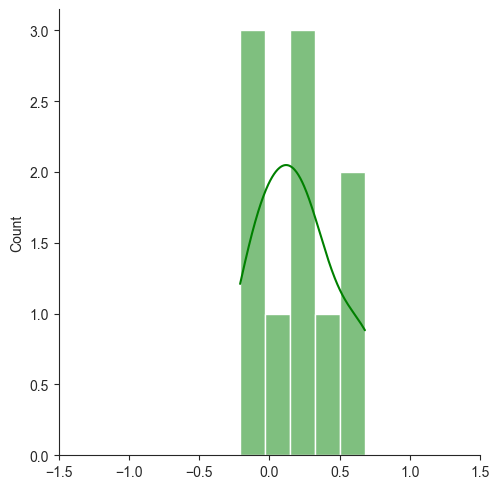

In [25]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

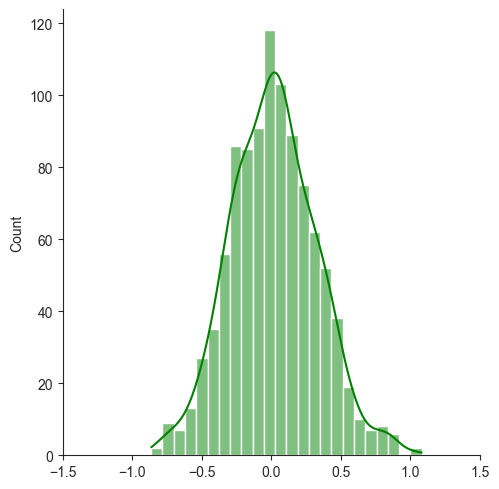

In [26]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

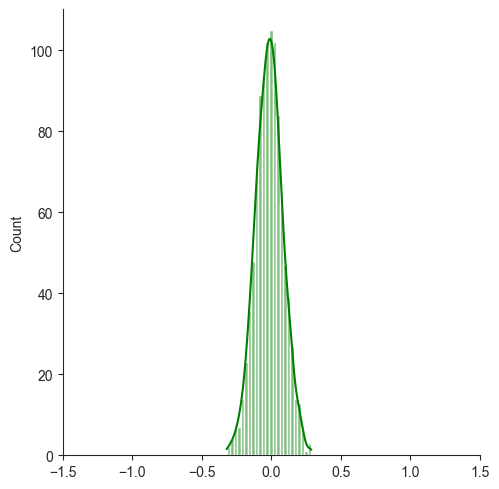

In [27]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Z-Scores - indicates how many standard deviations awawy from the mean a data point is.

In [28]:
x_i = 85
mu = 60
sigma = 10

In [29]:
x = np.random.normal(mu, sigma, 10000)

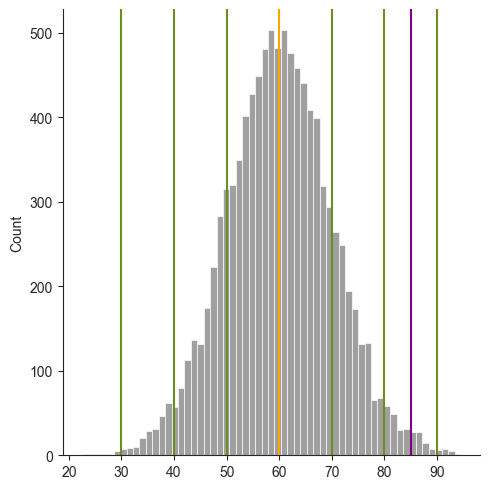

In [30]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [31]:
z = (x_i - mu) / sigma
z

2.5

In [32]:
st.norm.ppf(0.25)

-0.6744897501960817

The single sample t-test is a variation on the theme.

In [33]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [34]:
p_from_z(0)

1.0

In [35]:
x = [48, 50, 54, 60]

In [36]:
xbar = np.mean(x)
xbar

53.0

In [37]:
sx = st.sem(x)
sx

2.6457513110645907

In [38]:
t = (xbar-50)/sx
t

1.1338934190276817

T-Test is used to test whether the difference between the response of 2 groups is statistically significant or not.

P-Value - is a measures the probability of obtaining the observed results, assuming that the null hypothesis is true.

In [39]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [40]:
p_from_t(t, len(x))

0.33925405085645427

In [41]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.33925405085645427, df=3)

In [42]:
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [43]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [44]:
adelie = penguins[penguins.species == 'Adelie']
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [45]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [46]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

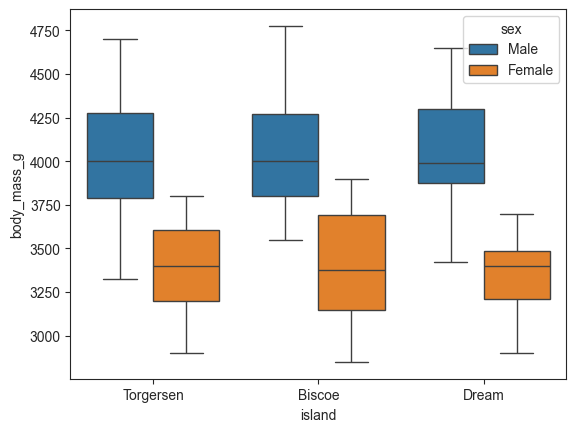

In [47]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

In [48]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy() / 1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [49]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy() / 1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [50]:
fbar = f.mean()
fbar

3.368835616438356

In [51]:
mbar = m.mean()
mbar

4.043493150684932

Welch T-Test - to quantify whether 2 

In [52]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [53]:
nf = f.size
nm = m.size

In [54]:
t = (fbar - mbar) / (sf / nf + sm / nm) ** (1 / 2)
t

-13.126285923485879

In [1]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny) ** 2 / (sx ** 2 / (nx ** 2 * (nx - 1)) + sy ** 2 / (ny ** 2 * (ny - 1)))

In [55]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [56]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

6.402319748031473e-26

In [57]:
-np.log10(p)

25.193662639886046

In [58]:
st.ttest_ind(f, m, equal_var=False)

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031473e-26, df=135.69357893530386)

Paired T-test is when you have 2 vectors where each element in vector x has a corresponding element in vector y.

In [59]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [61]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

In [62]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

In [63]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')] 
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


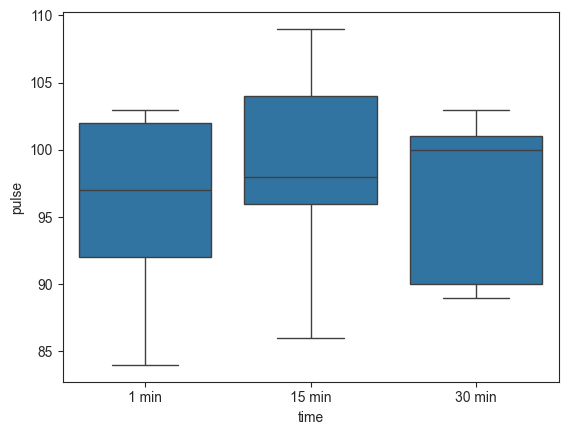

In [65]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [66]:
min1 = walk_no[walk_no.time == '1 min' ]['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [67]:
min1.mean()

95.6

In [70]:
min15 = walk_no[walk_no.time == '15 min' ]['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [69]:
min15.mean()

98.6

In [71]:
min30 = walk_no[walk_no.time == '30 min' ]['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [72]:
min30.mean()

96.6

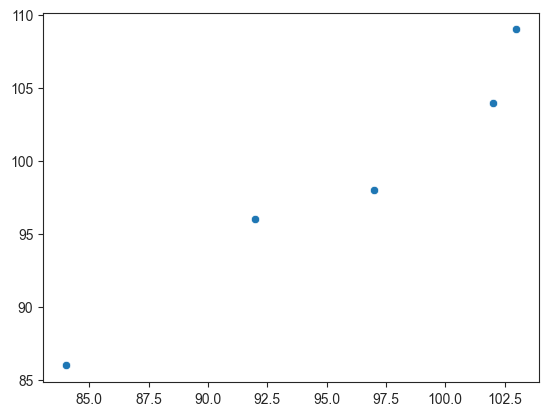

In [73]:
_ = sns.scatterplot(x= min1, y = min15)

In [74]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [75]:
dbar = d.mean()
dbar

3.0

In [76]:
sd = st.sem(d)

In [77]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])


In [78]:
xbar = x.mean()
s = x.std()
n = x.size

In [79]:
z = 1.96

In [80]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z * (my_s / my_n ** (1 / 2))

In [81]:
CIerr = CIerr_calc(z, s, n)
CIerr

3.4637403013216796

In [82]:
xbar + CIerr

58.08874030132168

In [83]:
xbar - CIerr

51.16125969867832

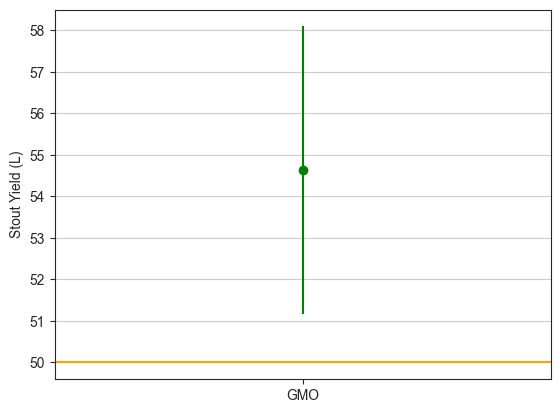

In [84]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

In [85]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

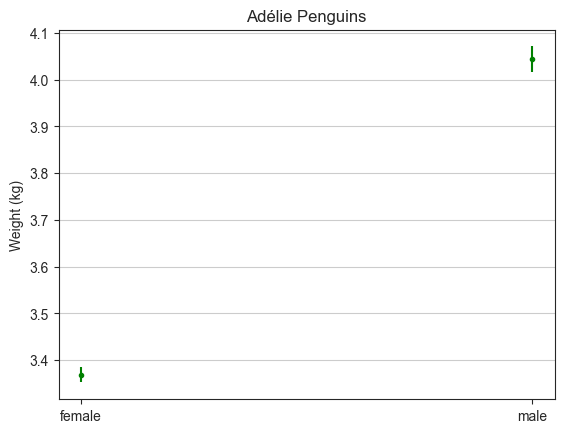

In [86]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr], fmt='.', color='green')

In [87]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [88]:
means = [t.mean(), b.mean(), d.mean()]

In [89]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1)

In [90]:
nt, nb, nd = t.size, b.size, d.size

In [91]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

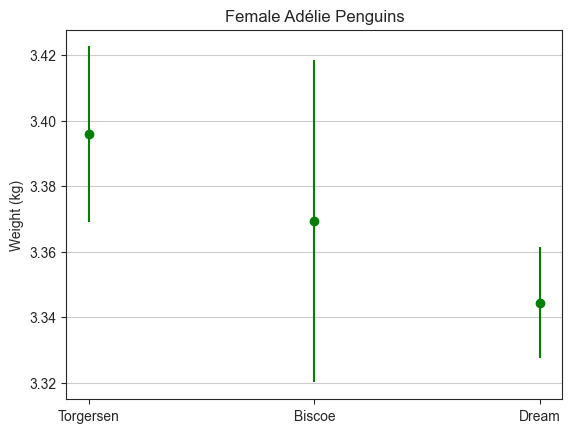

In [92]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs, fmt='o', color='green')

__Analysis of Variance (ANOVA)__ - allows you to compare more than 2 samples in a single statistical test. It makes these assumptions:
1. Independent Samples
2. Normally-distributed populations
3. _Homoscedasticity_ - population standard deviations are equal.

In [93]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

# Pearson Correlation Coefficient
__Covariance__ provides a measure of how related the variables aer to each other.

__Correlation__ builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

In [94]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
x = iris.sepal_length
y = iris.petal_length

In [96]:
sns.set_style('darkgrid')


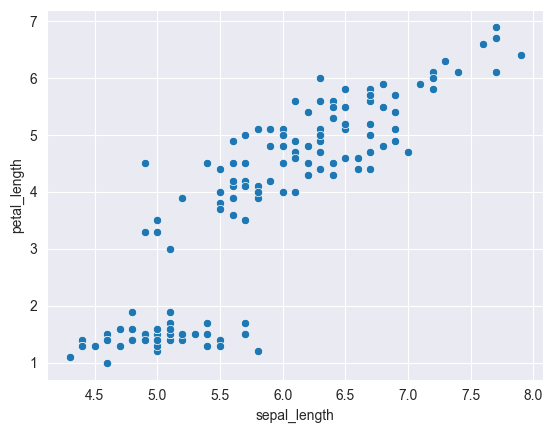

In [97]:
_ = sns.scatterplot(x=x, y=y)

In [98]:
n = iris.sepal_width.size
n

150

In [99]:
xbar, ybar = x.mean(), y.mean()

In [100]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [101]:
cov = sum(product)/n
cov

1.2658200000000006

In [102]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

In [103]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

In [104]:
p = p_from_t(t, n-1) 
p

1.0386674194495906e-47

In [105]:
-np.log10(p)

46.98352349096045

In [106]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8717537758865833, pvalue=1.0386674194496243e-47)

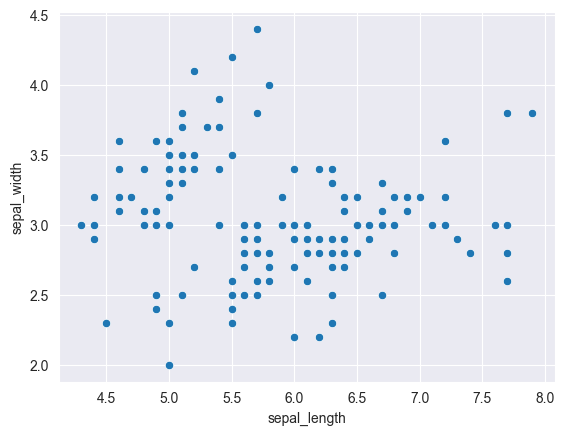

In [107]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [108]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

# The Coefficient of Determination

Also known as r^2, this is the proporation of variance in 1 variable, explained by another. It can range from 0 to 1 and it is simply the square of the Pearson r.

In [109]:
rsq = r**2
rsq

0.7599546457725157

In [110]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080679

# Correlation vs Causation
Correlation doesn't imply causation on its own. 3 criteria are required for inferring causal relationships:
1. __Covariation__: 2 variables vary together
2. __Temporal Precedence__: The affected variable must vary after the vausal variable is varied.
3. __Elimination of Extraneous Variables__: We must be sure no 3rd variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable. E.g., with (ideally double-blind) randomized control trials.

# Segment 2: Regression
### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

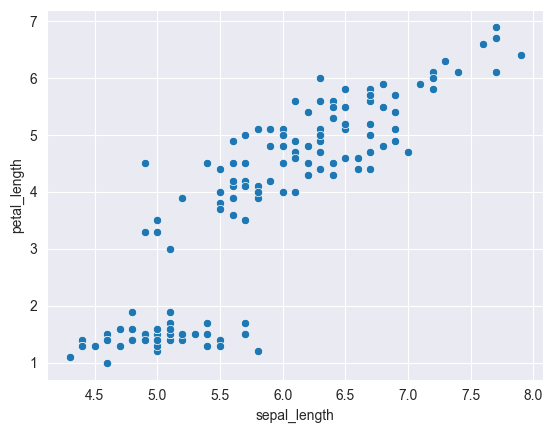

In [111]:
_ = sns.scatterplot(x=x, y=y)

__Cartesian Plane__ - is a 2-D surface, with y-axis perpendicular to horizontal x-axis.

In [112]:
beta1 = cov / np.var(x)
beta1

1.8584329782548417

In [113]:
beta0 = ybar - beta1 * xbar

In [114]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

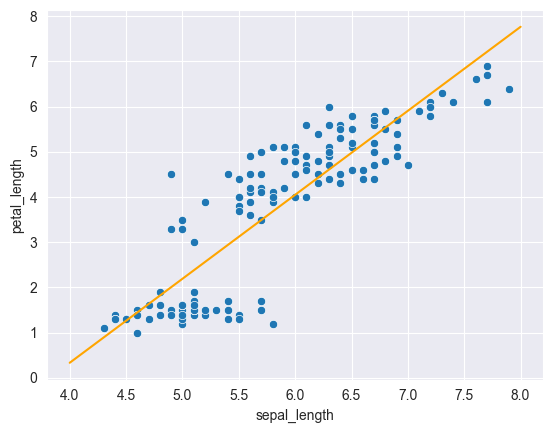

In [115]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

In [116]:
x_i = 5.5

In [117]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991708

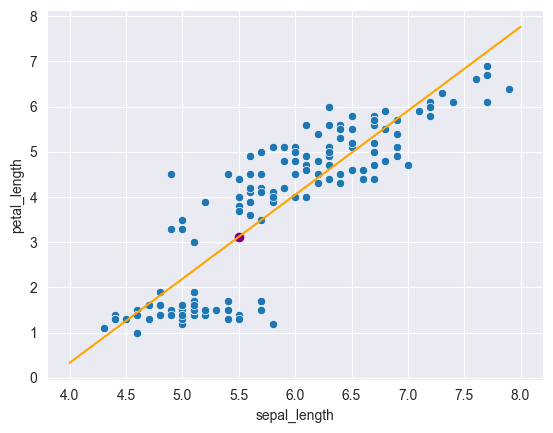

In [118]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

In [119]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])